# iSLIMS data exploration & extraction

DDOT has retired the iSLIMS database containing records of work orders from late 2006 to late 2016.  
However, they made the database available for the purposes of this study.  Lab @ DC staff (Kevin Wilson)
exported all the tables to csv files and (Donald Braman) reviewed all those files to see what might be
relevant to this project. We then exported the relevant subsets of data to pickled df files that are contained in
the project repo, excluding data that seemed irrelevant. 

Although we are only publishing a limited amount of data drawn from three tables, for data provenence purposes, \
we are publishing the steps we employed to extreact those data.  If the data is made public at some point in the future, 
or if analyses are conducted by someone, with access to the original iSlims data, they will know exactly 
what we did and how to recreate it. Data provenence! 


In [1]:
import pandas as pd
!pip install openpyxl
% matplotlib inline

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# start with the workorders table

In [2]:
df = pd.read_csv('data/trnWO.csv')
df.columns

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (30,36,37,38,39,40,44,45,46,47,49,50,67,68,69,71,72,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['woID', 'servicecodeID', 'srID', 'vendorWOID', 'ACSWOID', 'inventoryID',
       'priorityID', 'methodid', 'requesttypeID', 'workInstructions',
       'comments', 'enteredby', 'entereddate', 'archiveflag', 'setupID',
       'photolink', 'initialproblemID', 'finalresolutionID',
       'resolveddatetime', 'datedue', 'workstatusID', 'techID',
       'HansenUpdatedDate', 'HansenUpdatedStatus', 'vendorcloseDate',
       'acsSentDateTime', 'acsCloseDateTime', 'acsUpdateReturnCode',
       'acsSentTryCount', 'slfID', 'processme', 'vendorcomments', 'PSpermit',
       'PSbagnumber', 'PScontactname', 'PScontactphone', 'PSworkreason',
       'PSeffdatefrom', 'PSefftimefrom', 'PSefftimeto', 'PSeffdateto',
       'lastUpdateBy', 'lastUpdateDate', 'inspectedBy', 'inspectedDate',
       'inspectedStatus', 'inspectedNotes', 'csrNO', 'nameaddress',
       'requestedbyPhone', 'locStreetNumber', 'locStreetID', 'locStreetID2',
       'locProximityID', 'locQuadrantID', 'locWardID', 'targetLocationID'

In [3]:
len(df)

391090

In [4]:
df['resolveddatetime'] = pd.to_datetime(df['resolveddatetime'], infer_datetime_format=True)
df['entereddate'] = pd.to_datetime(df['entereddate'], infer_datetime_format=True)

Let's look at the scope of the data on work order entry & resolution. 

In [5]:
mask1 = (df['resolveddatetime'] > '2007-01-01') & (df['resolveddatetime'] < '2016-06-01')
mask2 = (df['entereddate'] > '2007-01-01') & (df['entereddate'] < '2016-06-01')
mask3 = df['finalresolutionID'] == 2
df['count'] = 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called head(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.resample() is now a deferred operation
You called tail(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  


                  count
resolveddatetime       
2004-12-31          1.0
2005-12-31          1.0
2006-12-31          1.0
2007-12-31          1.0
2008-12-31          1.0
                  count
resolveddatetime       
2022-12-31          NaN
2023-12-31          NaN
2024-12-31          NaN
2025-12-31          NaN
2026-12-31          1.0


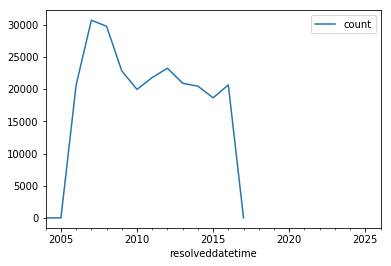

In [6]:
print(df[['resolveddatetime','count']].resample('A', on='resolveddatetime').head())
print(df[['resolveddatetime','count']].resample('A', on='resolveddatetime').tail())
df[mask3][['resolveddatetime','count']].resample('A', on='resolveddatetime').sum().plot()

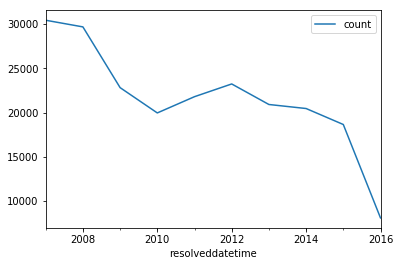

In [7]:
df[mask1 & mask2 & mask3][['resolveddatetime','count']].resample('A', on='resolveddatetime').sum().plot()

In [8]:
df[mask1 & mask2 & mask3][['resolveddatetime','count']].resample('A', on='resolveddatetime').sum()

,count
resolveddatetime,
2007-12-31,30436
2008-12-31,29684
2009-12-31,22818
2010-12-31,19958
2011-12-31,21795
2012-12-31,23234
2013-12-31,20912
2014-12-31,20457
2015-12-31,18650


In [9]:
some_vars = [ 'woID', 'inventoryID', 'srchAssetID', 'gpscoordinateX', 'gpscoordinateY', 'initialproblemID', 'resolveddatetime', 'entereddate', 'finalresolutionID']
df[some_vars].head()

,woID,inventoryID,srchAssetID,gpscoordinateX,gpscoordinateY,initialproblemID,resolveddatetime,entereddate,finalresolutionID
0,65209,4,-???-,NaN,NaN,55,2005-06-20,2005-06-17 00:00:00,55
1,66089,4,-???-,NaN,NaN,32,2005-08-22,2005-08-16 00:00:00,32
2,67632,4,-???-,NaN,NaN,55,2005-12-08,2005-12-07 00:00:00,55
3,68957,4,-???-,NaN,NaN,12,2006-03-22,2006-03-22 07:15:44,190
4,68958,4,-???-,NaN,NaN,12,2006-03-22,2006-03-22 07:40:33,190


OK, right out of the gate, we see that where the Asset ID isn't known, the lat & lon are also missing. 
Let's see what else we can learn about what is missing. 

In [10]:
df['srchAssetID'].value_counts().head()

-???-    129474
4R086        57
57483        48
57378        47
4N832        45
Name: srchAssetID, dtype: int64

There are a lot of places where the AssetID is unknown.  Maybe those are bad calls, and there is no available data for us to 
find, but maybe not. There seems to be an inventoryID for them, which makes me curious...

In [11]:
mask4 = df['srchAssetID'] == '-???-'

In [12]:
df[mask4]['inventoryID'].value_counts().head()

4    129474
Name: inventoryID, dtype: int64

Alright, so we're getting no new information from the inventory ID. But if we know what the problem is, and where it is, then 
maybe we don't need to know the exact asset.  Let's see what we can see: 

In [13]:
top_fail = df[mask4]['finalresolutionID'].value_counts().head(50)
top_fail

2      79488
197    15635
8       5248
97      2939
12      2276
196     1972
11      1760
190     1374
143     1315
336     1273
9       1153
6       1153
55      1117
3       1074
10       920
13       846
69       821
195      690
125      662
18       562
45       518
5        452
74       388
426      359
204      349
15       331
65       292
7        279
439      240
19       240
142      223
32       166
4        165
99       165
374      141
350      126
131      109
98       108
76       107
201       98
423       92
39        90
132       90
122       87
444       86
66        81
33        80
105       76
43        75
357       74
Name: finalresolutionID, dtype: int64

OK, there are 79K light out problems (2).  Do we know where those are? 

In [14]:
mask5 = df['finalresolutionID']
df[mask4 & mask5 ]['gpscoordinateX'].value_counts().head()

38.950274    169
38.946868    159
38.889793     81
38.981244     58
38.902502     54
Name: gpscoordinateX, dtype: int64

In [15]:
df[mask4 & mask5]['resolveddatetime'].head()

0    2005-06-20
2    2005-12-08
12          NaT
13   2006-03-28
20          NaT
Name: resolveddatetime, dtype: datetime64[ns]

In [16]:
sum(df[mask4 & mask5]['resolveddatetime'].isnull())

816

That's enough for me to think it might be relevant.  Looks like it probably makes sense to just include all records with the subset of relevant vars 

In [17]:
df[some_vars].to_excel('data/islims_workorders.xlsx')

/opt/conda/lib/python3.6/site-packages/pandas/io/excel.py:784: DeprecationWarning: Call to deprecated function remove_sheet (Use wb.remove(worksheet) or del wb[sheetname]).
  self.book.remove_sheet(self.book.worksheets[0])


# now, workorder details

In [18]:
df = pd.read_csv('data/trnWODetail.csv')
df.columns

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['wodetailsID', 'woID', 'daterequest', 'timerequest', 'datedue',
       'timedue', 'datecomplete', 'timecomplete', 'ProblemID',
       'Problemassignedto', 'Problemcomments', 'ResolutionstatusID',
       'enteredby', 'entereddate', 'archiveflag', 'setupID', 'vendorcloseDate',
       'closedby', 'daysLate', 'daysToComplete', 'srchWorkStatus',
       'srchProblems', 'srchAssignedTo', 'McDSentTryCount', 'McDReturnCode',
       'McDSentDate', 'McDResolvedDate', 'McDeanWOID'],
      dtype='object')

In [19]:
len(df)

468966

In [20]:
df['woID'].value_counts().head(), df['wodetailsID'].value_counts().head()

(1151007    126
 1155788     84
 1142193     72
 1155903     67
 1143084     56
 Name: woID, dtype: int64, 1054717    1
 1695120    1
 650646     1
 682338     1
 1590691    1
 Name: wodetailsID, dtype: int64)

So, it looks like there are more details than workorders.  Makes sense: you might want to associate more than one report of an outage with an outage, etc. 

In [21]:
some_vars = [
    'wodetailsID', 'woID', 'ProblemID', 'entereddate', 'datecomplete', 'timecomplete', 'daysToComplete', 'daysLate', 
    'daterequest', 'timerequest',  
    ]
df[some_vars]

,wodetailsID,woID,ProblemID,entereddate,datecomplete,timecomplete,daysToComplete,daysLate,daterequest,timerequest
0,8337,1146513,55,6/17/2005 12:00:00 AM,10/30/2014 9:07:23 AM,10/30/2014 9:07:23 AM,0.0,0.0,10/30/2014 9:07:23 AM,10/30/2014 9:07:23 AM
1,9401,55,55,8/16/2005 12:00:00 AM,8/22/2005 12:00:00 AM,12/30/1899 9:58:02 AM,NaN,NaN,2/19/2015 12:00:00 AM,12/30/1899 9:58:02 AM
2,11240,1156983,55,12/7/2005 12:00:00 AM,12/8/2005 12:00:00 AM,12/30/1899 8:27:00 AM,1.0,0.0,12/7/2005 12:00:00 AM,12/30/1899 8:27:00 AM
3,53664,68957,12,3/22/2006 7:15:44 AM,3/22/2006 12:00:00 AM,NaN,0.0,0.0,3/22/2006 7:15:44 AM,3/22/2006 7:15:44 AM
4,53665,68958,12,3/22/2006 7:40:33 AM,3/22/2006 12:00:00 AM,NaN,0.0,0.0,3/22/2006 7:40:33 AM,3/22/2006 7:40:33 AM
5,53667,68960,7,3/22/2006 8:56:59 AM,4/3/2006 12:00:00 AM,4/3/2006 12:00:00 AM,12.0,11.0,3/22/2006 8:56:59 AM,3/22/2006 8:56:59 AM
6,53668,68961,43,3/22/2006 9:13:18 AM,3/23/2006 12:00:00 AM,3/23/2006 12:00:00 AM,1.0,0.0,3/22/2006 9:13:18 AM,3/22/2006 9:13:18 AM
7,53669,68962,13,3/22/2006 9:39:37 AM,3/30/2006 12:00:00 AM,3/30/2006 12:00:00 AM,8.0,0.0,3/22/2006 12:00:00 AM,3/22/2006 9:39:36 AM
8,53670,68963,2,3/22/2006 9:50:17 AM,3/22/2006 12:00:00 AM,3/22/2006 12:00:00 AM,0.0,0.0,3/22/2006 9:50:17 AM,3/22/2006 9:50:17 AM
9,53673,68967,43,3/22/2006 11:54:55 AM,3/28/2006 12:00:00 AM,3/28/2006 12:00:00 AM,6.0,0.0,3/22/2006 12:00:00 AM,3/22/2006 11:54:54 AM


TBH, I can't tell what is what here.  Seems like datereqeuest and timerequest are not always consistent with entereddate. 
And sometimes the completion occurs before the datereqeust, timereqeust and dateentered. I'll add them all, and leave the exploration for another time.  But maybe not so bad for light repairs?  Let's see...

In [22]:
mask1 = df['ProblemID'] == 2
df[mask1]

,wodetailsID,woID,daterequest,timerequest,datedue,timedue,datecomplete,timecomplete,ProblemID,Problemassignedto,...,daysLate,daysToComplete,srchWorkStatus,srchProblems,srchAssignedTo,McDSentTryCount,McDReturnCode,McDSentDate,McDResolvedDate,McDeanWOID
8,53670,68963,3/22/2006 9:50:17 AM,3/22/2006 9:50:17 AM,3/28/2006 9:50:17 AM,NaN,3/22/2006 12:00:00 AM,3/22/2006 12:00:00 AM,2,58,...,0.0,0.0,Closed Action Taken,(Light out),SL:MC DEAN,0,precede,NaN,NaN,NaN
22,53700,68984,3/23/2006 3:58:29 PM,3/23/2006 3:58:29 PM,3/29/2006 3:58:29 PM,NaN,3/31/2006 12:00:00 AM,3/31/2006 12:00:00 AM,2,58,...,2.0,8.0,Closed Action Taken,(Light out),SL:MC DEAN,0,precede,NaN,NaN,NaN
24,53702,68986,3/23/2006 12:00:00 AM,3/23/2006 4:22:10 PM,3/29/2006 12:00:00 AM,NaN,3/30/2006 12:00:00 AM,3/30/2006 12:00:00 AM,2,58,...,1.0,7.0,Closed Action Taken,(Light out),SL:MC DEAN,0,precede,NaN,NaN,NaN
25,53703,68987,3/23/2006 4:42:35 PM,3/23/2006 4:42:35 PM,3/29/2006 4:42:35 PM,NaN,3/31/2006 12:00:00 AM,3/31/2006 12:00:00 AM,2,58,...,2.0,8.0,Closed Action Taken,(Light out),SL:MC DEAN,0,precede,NaN,NaN,NaN
26,53704,68988,3/23/2006 12:00:00 AM,3/23/2006 5:02:59 PM,3/29/2006 12:00:00 AM,NaN,4/4/2006 12:00:00 AM,4/4/2006 12:00:00 AM,2,58,...,6.0,12.0,Closed Action Taken,(Light out),SL:MC DEAN,0,precede,NaN,NaN,NaN
28,53706,68989,3/23/2006 5:19:59 PM,3/23/2006 5:19:59 PM,3/29/2006 5:19:59 PM,NaN,3/31/2006 12:00:00 AM,3/31/2006 12:00:00 AM,2,58,...,2.0,8.0,Closed Action Taken,(Light out),SL:MC DEAN,0,precede,NaN,NaN,NaN
34,53717,68997,3/24/2006 12:00:00 AM,3/24/2006 1:00:44 PM,3/30/2006 12:00:00 AM,NaN,3/24/2006 12:00:00 AM,3/24/2006 12:00:00 AM,2,355,...,0.0,0.0,Closed Action Taken,(Light out),SL:DDOT:TOA/ED/Construction,0,precede,NaN,NaN,NaN
35,53718,68997,3/24/2006 1:07:26 PM,3/24/2006 1:07:26 PM,3/30/2006 1:07:26 PM,NaN,3/24/2006 12:00:00 AM,3/24/2006 12:00:00 AM,2,58,...,NaN,NaN,Closed Action Taken,(Light out),SL:MC DEAN,0,precede,NaN,NaN,NaN
36,53720,68999,3/24/2006 1:55:29 PM,3/24/2006 1:55:29 PM,3/30/2006 1:55:29 PM,NaN,4/6/2006 12:00:00 AM,4/6/2006 12:00:00 AM,2,58,...,7.0,13.0,Closed Action Taken,(Light out),SL:MC DEAN,0,precede,NaN,NaN,NaN
69,53760,69027,3/28/2006 10:47:28 AM,3/28/2006 10:47:28 AM,4/3/2006 10:47:28 AM,NaN,3/30/2006 12:00:00 AM,3/30/2006 12:00:00 AM,2,58,...,0.0,2.0,Closed Action Taken,(Light out),SL:MC DEAN,0,precede,NaN,NaN,NaN


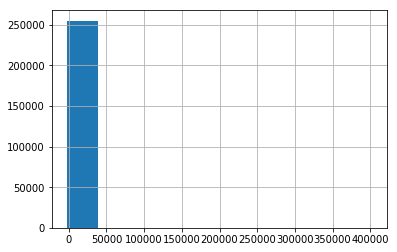

In [23]:
df[mask1]['daysToComplete'].hist()

So, like almost every other data set I've ever seen, there is some wonky data here. Clearly there are no rails on what kind of date can be entered, so some folks are entering in dates that are decades out.  Let's see what happens if we crop the tails. 

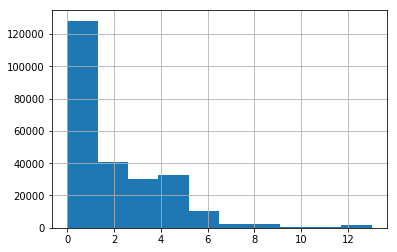

In [24]:
mask2 = df['daysToComplete'] < 14
mask3 = df['daysToComplete'] > -1
df[mask1 & mask2 & mask3]['daysToComplete'].hist()

OK, that seems much better. Maybe some industrious person will want to correct the data later using some clever method. Rather than cull the outlier data here, though, let's export and cull it downstream. 

In [25]:
df[some_vars].to_excel('data/islims_workorders_detail.xlsx')

/opt/conda/lib/python3.6/site-packages/pandas/io/excel.py:784: DeprecationWarning: Call to deprecated function remove_sheet (Use wb.remove(worksheet) or del wb[sheetname]).
  self.book.remove_sheet(self.book.worksheets[0])


# look up failure codes 

In [26]:
df = pd.read_csv('data/lookupFailureCodes.csv')
df.columns

Index(['failcodeID', 'failuretype', 'description', 'p1hourstoresolve',
       'p1pctcomplete', 'p1days', 'p2hourstoresolve', 'p2pctcomplete',
       'p2days', 'p3hourstoresolve', 'p3pctcomplete', 'p3days',
       'p4hourstoresolve', 'p4pctcomplete', 'p4days', 'p5hourstoresolve',
       'p5pctcomplete', 'p5days', 'excludesatsunhol', 'damagesassessedafter',
       'damagerate', 'servicecodeID', 'enteredby', 'entereddate',
       'archiveflag', 'setupID', 'hansenCODE', 'acsCODE', 'acsrepaircodeID',
       'performgroup', 'showonfocusrpt', 'useWOsystemdate',
       'inventoryupdateflag', 'cwDESC', 'cwfailcodeID'],
      dtype='object')

In [27]:
df.head()

,failcodeID,failuretype,description,p1hourstoresolve,p1pctcomplete,p1days,p2hourstoresolve,p2pctcomplete,p2days,p3hourstoresolve,...,setupID,hansenCODE,acsCODE,acsrepaircodeID,performgroup,showonfocusrpt,useWOsystemdate,inventoryupdateflag,cwDESC,cwfailcodeID
0,2,P,(Light out),6,50.0,3.0,6,99.0,6.0,6,...,1,S05SL,NaN,0.0,02 Light out and Light off/on,N,N,N,Streetlight Repair,2.0
1,3,P,(Light off/on),6,50.0,3.0,6,99.0,6.0,6,...,1,S05SL,NaN,0.0,02 Light out and Light off/on,N,N,N,NaN,0.0
2,4,P,(Light dim),6,50.0,3.0,6,99.0,6.0,6,...,1,S05GR,NaN,0.0,11 Light dim,N,N,N,AlleyLight Repair,2.0
3,5,P,(Pole leaning),7,50.0,4.0,7,99.0,8.0,7,...,1,S05GR,NaN,0.0,16 Pole leaning,N,N,N,NaN,0.0
4,6,P,(Base door missing),30,50.0,15.0,30,99.0,30.0,30,...,1,TPLAT,NaN,0.0,"14 Base door missing, install base door, pole ...",N,N,N,NaN,0.0


In [28]:
mask1 = df['failcodeID'] == 2
df[mask1]

,failcodeID,failuretype,description,p1hourstoresolve,p1pctcomplete,p1days,p2hourstoresolve,p2pctcomplete,p2days,p3hourstoresolve,...,setupID,hansenCODE,acsCODE,acsrepaircodeID,performgroup,showonfocusrpt,useWOsystemdate,inventoryupdateflag,cwDESC,cwfailcodeID
0,2,P,(Light out),6,50.0,3.0,6,99.0,6.0,6,...,1,S05SL,NaN,0.0,02 Light out and Light off/on,N,N,N,Streetlight Repair,2.0


In [29]:
some_vars = ['failcodeID','description']
df[some_vars]

,failcodeID,description
0,2,(Light out)
1,3,(Light off/on)
2,4,(Light dim)
3,5,(Pole leaning)
4,6,(Base door missing)
5,7,(Pole down)
6,8,(24-Hour burning)
7,9,"(Globe, lens dirty)"
8,10,"(Globe, lens hanging)"
9,11,"(Globe, lens missing)"


In [30]:
mask1 = df['description'].str.contains('ight out')
df[mask1][some_vars]

,failcodeID,description
0,2,(Light out)
154,195,(Overhead guide sign light out)
155,196,(Underpass light out)
160,201,(MPD hot spot light out)
165,206,(Welcome to Washington sign light out)
168,209,(Bridge light out)
170,211,Fender light out
171,212,Obstruction light out
261,333,(China Town light out)
265,337,(Fender light out)


In [31]:
mask2 = df['failcodeID'].isin(top_fail.index)
df[mask2][some_vars]

,failcodeID,description
0,2,(Light out)
1,3,(Light off/on)
2,4,(Light dim)
3,5,(Pole leaning)
4,6,(Base door missing)
5,7,(Pole down)
6,8,(24-Hour burning)
7,9,"(Globe, lens dirty)"
8,10,"(Globe, lens hanging)"
9,11,"(Globe, lens missing)"


In [32]:
df[mask1 & mask2][some_vars]

,failcodeID,description
0,2,(Light out)
154,195,(Overhead guide sign light out)
155,196,(Underpass light out)
160,201,(MPD hot spot light out)
278,350,(Navigation light out)
354,426,(Underdeck light out)


Interesting ... let's just save the data out for later us. 

In [33]:
df[some_vars].to_excel('data/islims_failure_codes.xlsx')

/opt/conda/lib/python3.6/site-packages/pandas/io/excel.py:784: DeprecationWarning: Call to deprecated function remove_sheet (Use wb.remove(worksheet) or del wb[sheetname]).
  self.book.remove_sheet(self.book.worksheets[0])


# and, finally, inventory

In [34]:
df = pd.read_csv('data/trnInventory.csv')
df.columns

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11,12,13,17,18,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['inventoryID', 'altinventoryIDchar', 'altinventoryIDno',
       'servicecodeID', 'quadrantID', 'houseno', 'streetID', 'cityID',
       'statecode', 'offset',
       ...
       'PMmultispacemetercount', 'PMcurrentmeterstatus', 'WO_30days',
       'focusarea', 'assetinspectiondate', 'assetinspectionby',
       'PMmetercondition', 'srchWard', 'srchQuad', 'srchCity'],
      dtype='object', length=153)

In [35]:
df.columns[0:100]

Index(['inventoryID', 'altinventoryIDchar', 'altinventoryIDno',
       'servicecodeID', 'quadrantID', 'houseno', 'streetID', 'cityID',
       'statecode', 'offset', 'gridreferencenumber', 'gpscoordinateX',
       'gpscoordinateY', 'streetplat', 'wardID', 'inventorydate', 'grade',
       'blockno', 'squareno', 'comments', 'sisID', 'ownerID', 'enteredby',
       'entereddate', 'archiveflag', 'setupID', 'proximityID', 'crossstreetID',
       'SLpepcolightID', 'SLlighttype', 'SLwattage', 'SLpoletype',
       'SLpoleheight', 'SLpolestyle', 'SLpowerfeed', 'SLnumberarms',
       'SLarmlength', 'SLrdtype', 'SLfixture', 'PMlastupdatedate',
       'PMlastupdatetime', 'PMsideofstreet', 'PMmeterhead',
       'PMpostinstallation', 'PMsurface', 'PMmechmanufacturer',
       'PMmechanismtype', 'PMdayfrom', 'PMdayto', 'PMday1ahoursfrom',
       'PMday1ahoursto', 'PMday1ahourlyrate', 'PMday1alimit',
       'PMday1bhoursfrom', 'PMday1bhoursto', 'PMday1bhourlyrate',
       'PMday1blimit', 'PMday1choursfro

The SL vars are the streetlight ones, so let's export those. 

In [36]:
some_vars = ['inventoryID', 'altinventoryIDchar', 'gpscoordinateX', 'gpscoordinateY', 
             'SLpepcolightID', 'SLlighttype', 'SLwattage', 'SLpoletype',
           'SLpoleheight', 'SLpolestyle', 'SLpowerfeed', 'SLnumberarms',
           'SLarmlength', 'SLrdtype', 'SLfixture']
df[some_vars].head()

,inventoryID,altinventoryIDchar,gpscoordinateX,gpscoordinateY,SLpepcolightID,SLlighttype,SLwattage,SLpoletype,SLpoleheight,SLpolestyle,SLpowerfeed,SLnumberarms,SLarmlength,SLrdtype,SLfixture
0,4,-???-,NaN,NaN,??,High Pressure Sodium,100.0,Wood,??,??,??,?,0,??,??
1,200489,14536,38.9264,-77.0397,??,High Pressure Sodium,250.0,Metal,16,16,Underground,0,0,ST,HPS Conversion Kit
2,200490,12177DC,38.9254,-77.0509,??,Incandescent,189.0,Wood,??,??,Underground,1,3,ST,Incandescent Fixture
3,200491,14532,38.9256,-77.0514,??,High Pressure Sodium,150.0,Metal,16,16,Underground,0,0,ST,HPS Conversion Kit
4,200492,12187,38.9255,-77.0515,??,High Pressure Sodium,150.0,Metal,16,16,Underground,0,0,ST,HPS Conversion Kit


In [37]:
df[some_vars].to_excel('data/islims_inventory.xlsx')

/opt/conda/lib/python3.6/site-packages/pandas/io/excel.py:784: DeprecationWarning: Call to deprecated function remove_sheet (Use wb.remove(worksheet) or del wb[sheetname]).
  self.book.remove_sheet(self.book.worksheets[0])
